In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc 
import datetime as dt
import os
import glob
import cmocean
from salishsea_tools import viz_tools, places, visualisations

%matplotlib inline

In [2]:
x=np.arange(0,10)
print('x:',x)
y=x[4:8]
print('y:',y)
print('last element:', x[-1])
print('all of x:',x[:])

x: [0 1 2 3 4 5 6 7 8 9]
y: [4 5 6 7]
last element: 9
all of x: [0 1 2 3 4 5 6 7 8 9]


In [3]:
places.PLACES['S3']

{'lon lat': (-123.558, 49.125),
 'NEMO grid ji': (450, 258),
 'GEM2.5 grid ji': (138, 144)}

### Load a file from the 201812 hindcast

In [4]:
f=nc.Dataset('/results/SalishSea/nowcast-green.201812/01apr15/SalishSea_1h_20150401_20150401_ptrc_T.nc')

In [5]:
print(f.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'nitrate', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton'])


In [6]:
fe3t=nc.Dataset('/results/SalishSea/nowcast-green.201812/01apr15/SalishSea_1h_20150401_20150401_carp_T.nc')

In [7]:
print(fe3t.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'PAR', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'sigma_theta', 'e3t', 'dissolved_inorganic_carbon', 'total_alkalinity', 'dissolved_oxygen'])


In [8]:
fe3t.variables['time_centered']

<class 'netCDF4._netCDF4.Variable'>
float64 time_centered(time_counter)
    standard_name: time
    long_name: Time axis
    calendar: gregorian
    units: seconds since 1900-01-01 00:00:00
    time_origin: 1900-01-01 00:00:00
    bounds: time_centered_bounds
unlimited dimensions: time_counter
current shape = (24,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [9]:
# return times as datetime objects:
torig=dt.datetime.strptime(f.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')

In [10]:
torig

datetime.datetime(1900, 1, 1, 0, 0)

In [11]:
f.variables['time_centered'][:]

masked_array(data=[3.6368370e+09, 3.6368406e+09, 3.6368442e+09,
                   3.6368478e+09, 3.6368514e+09, 3.6368550e+09,
                   3.6368586e+09, 3.6368622e+09, 3.6368658e+09,
                   3.6368694e+09, 3.6368730e+09, 3.6368766e+09,
                   3.6368802e+09, 3.6368838e+09, 3.6368874e+09,
                   3.6368910e+09, 3.6368946e+09, 3.6368982e+09,
                   3.6369018e+09, 3.6369054e+09, 3.6369090e+09,
                   3.6369126e+09, 3.6369162e+09, 3.6369198e+09],
             mask=False,
       fill_value=1e+20)

In [12]:
times=np.array([torig+dt.timedelta(seconds=ii) for ii in \
               f.variables['time_centered'][:]])

In [13]:
times

array([datetime.datetime(2015, 4, 1, 0, 30),
       datetime.datetime(2015, 4, 1, 1, 30),
       datetime.datetime(2015, 4, 1, 2, 30),
       datetime.datetime(2015, 4, 1, 3, 30),
       datetime.datetime(2015, 4, 1, 4, 30),
       datetime.datetime(2015, 4, 1, 5, 30),
       datetime.datetime(2015, 4, 1, 6, 30),
       datetime.datetime(2015, 4, 1, 7, 30),
       datetime.datetime(2015, 4, 1, 8, 30),
       datetime.datetime(2015, 4, 1, 9, 30),
       datetime.datetime(2015, 4, 1, 10, 30),
       datetime.datetime(2015, 4, 1, 11, 30),
       datetime.datetime(2015, 4, 1, 12, 30),
       datetime.datetime(2015, 4, 1, 13, 30),
       datetime.datetime(2015, 4, 1, 14, 30),
       datetime.datetime(2015, 4, 1, 15, 30),
       datetime.datetime(2015, 4, 1, 16, 30),
       datetime.datetime(2015, 4, 1, 17, 30),
       datetime.datetime(2015, 4, 1, 18, 30),
       datetime.datetime(2015, 4, 1, 19, 30),
       datetime.datetime(2015, 4, 1, 20, 30),
       datetime.datetime(2015, 4, 1, 21, 30)

In [14]:
# load model mesh
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


### Dept Profile

Text(0.5, 0, 'Concentration ($\\mu$M)')

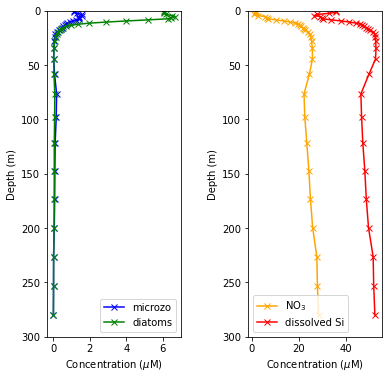

In [17]:
fig,ax=plt.subplots(1,2,figsize=(6,6))
fig.subplots_adjust(wspace=.5) # space the axes out more
il=12
# use location 'S3'
ij,ii=places.PLACES['S3']['NEMO grid ji']
ax[0].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,
                             f.variables['microzooplankton'][il,:,ij,ii]),
          f.variables['deptht'][:],'b-x',label='microzo')
ax[0].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['diatoms'][il,:,ij,ii]),f.variables['deptht'][:],'g-x',label='diatoms')
ax[0].set_ylim(300,0)
ax[0].legend()
ax[0].set_xlabel('Concentration ($\mu$M)')
ax[0].set_ylabel('Depth (m)')
ax[1].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['nitrate'][il,:,ij,ii]),f.variables['deptht'][:],'-x',color='orange',label='NO$_3$')
ax[1].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['silicon'][il,:,ij,ii]),f.variables['deptht'][:],'-x',color='r',label='dissolved Si')
ax[1].set_ylim(300,0)
ax[1].set_ylabel('Depth (m)')
ax[1].legend()
ax[1].set_xlabel('Concentration ($\mu$M)')